# Large scale dimensionality reduction

Piotr Urbańczyk,
Piotr Van-Selow

1. Load the file.

Note that the file is large. You may needs at least 25G (32G) allocated memory to load it. The experiments are even more memory consuming. 

`srun --time=2:00:00 --mem=64G --cpus-per-task=8 --ntasks=1 --partition=plgrid --account=[grantname]-cpu --pty /bin/bash`

In [1]:
import numpy as np

file_path = "/net/pr2/projects/plgrid/plgglscclass/geometricus_embeddings/X_concatenated_all_dims.npy"
X_loaded = np.load(file_path, allow_pickle=True)
print(X_loaded.shape)

(4035121, 844)


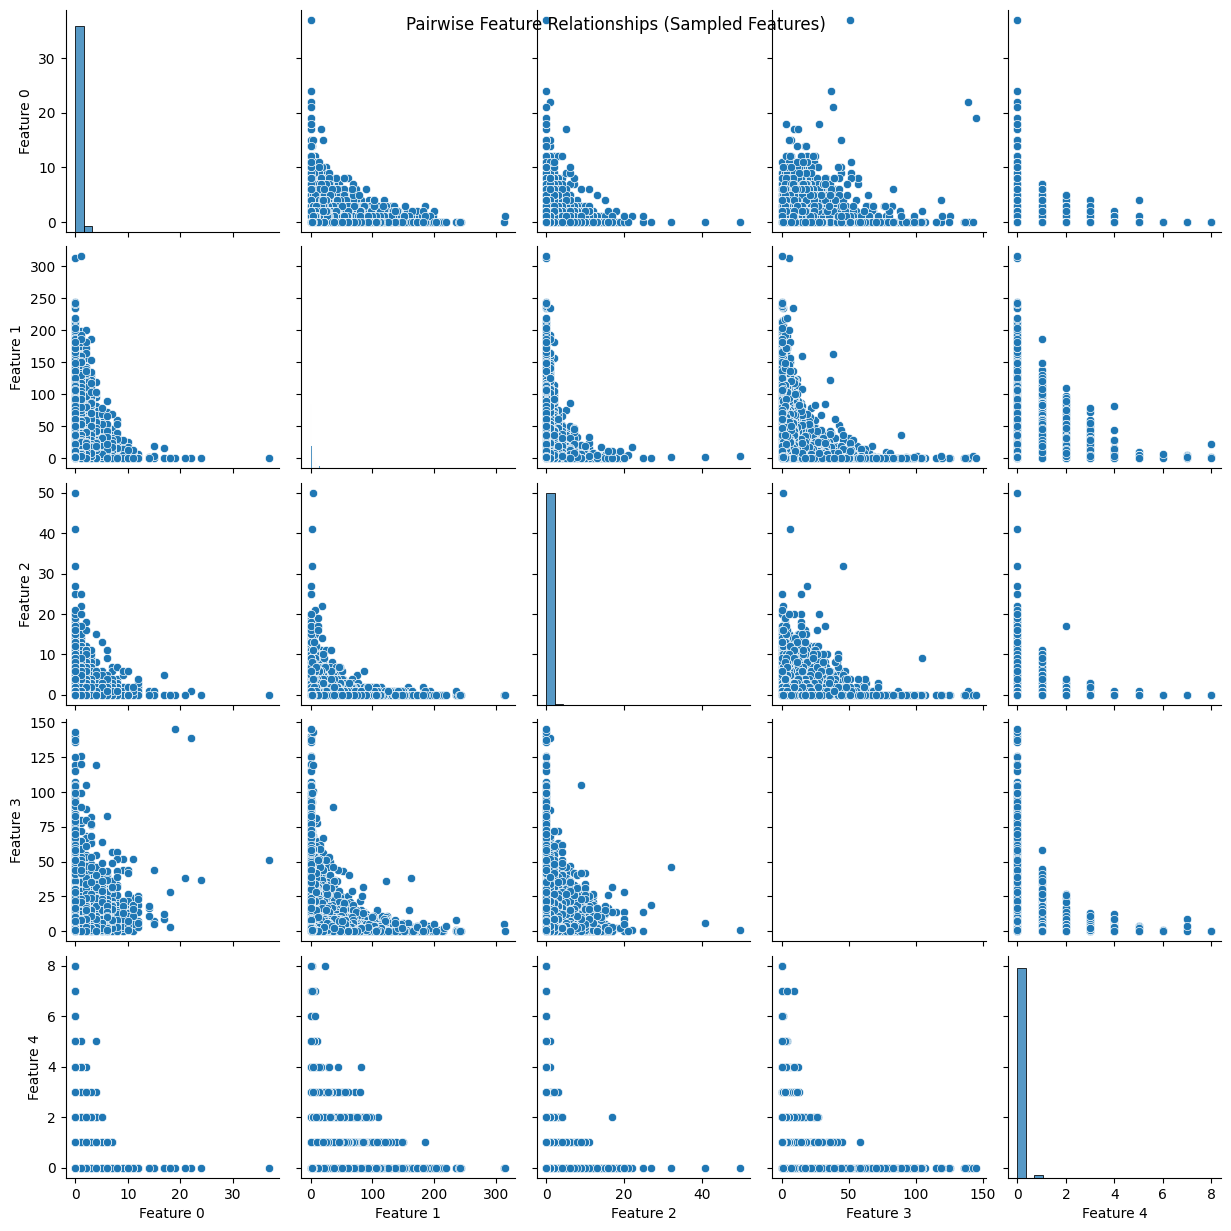

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sampled_features = np.random.choice(X_loaded.shape[1], size=5, replace=False)
df_sampled = pd.DataFrame(X_loaded[:, sampled_features], columns=[f"Feature {i}" for i in range(5)])

sns.pairplot(df_sampled)
plt.title("Pairwise Feature Relationships (Sampled Features)")
plt.show()


2. Start the experiments

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from pacmap import PaCMAP
from trimap import TRIMAP

results = {}

reducers = {
    "PCA": PCA(n_components=2),
    # "UMAP": UMAP(n_components=2), # kernel crush
    # "TriMap": TRIMAP(n_dims=2),
    # "PaCMAP": PaCMAP(n_components=2, n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0),
    # "t-SNE": TSNE(n_components=2, perplexity=50, n_iter=500), #time-consuming, incr. pepexlity, decr. n_iter
}

print("Experiment start...")
for name, reducer in reducers.items():
    print(f"Running {name}...")
    start_time = time.time()
    X_reduced = reducer.fit_transform(X_loaded)
    elapsed_time = time.time() - start_time
    results[name] = {"data": X_reduced, "time": elapsed_time}
    print(f"{name} completed in {elapsed_time:.2f} seconds.")


Experiment start...
Running PCA...
PCA completed in 51.07 seconds.


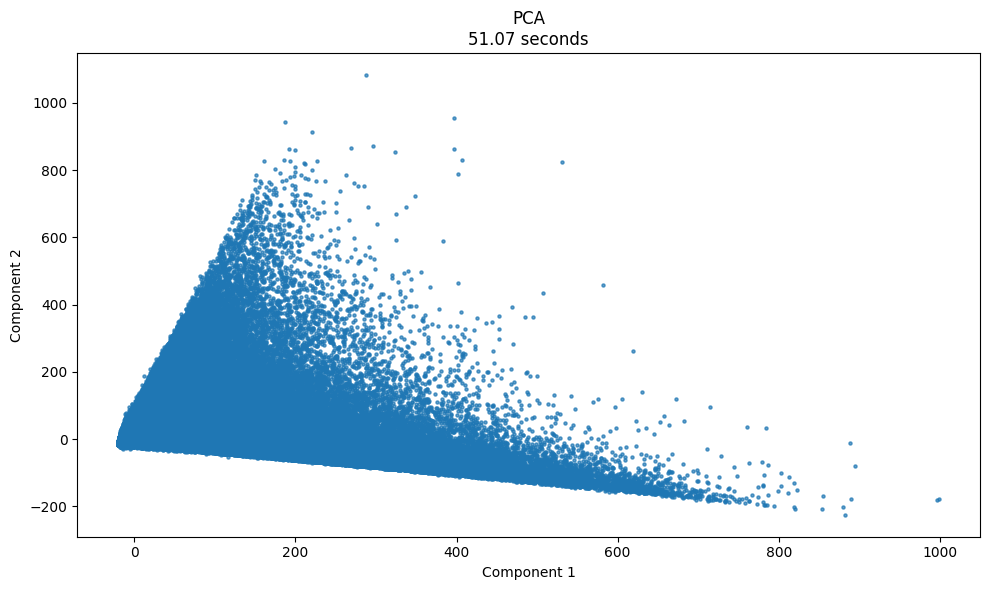

In [14]:
def plot_reducers(results):
    for name, result in results.items():
        fig, ax = plt.subplots(figsize=(10, 6))
        X_reduced = result["data"]
        ax.scatter(X_reduced[:, 0], X_reduced[:, 1], s=5, alpha=0.7)
        ax.set_xlabel("Component 1")
        ax.set_ylabel("Component 2")
        ax.set_title(f"{name}\n{result['time']:.2f} seconds")
        plt.tight_layout()
        plt.show()

plot_reducers(results)